# Diabetes Prediction 

In [8]:
# let's start with importing library necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [9]:
# read the data file
data= pd.read_csv('/config/workspace/Dataset/diabetes.csv')

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

We can see here few data for Glucose,insulin, skin thickness,BMI and Blood Pressure which have value as 0. That's not possible, right? you can do a quick search to see that one cannot have 0 values for these.Let's deal with that. We can either remove such data or simply replace it with their respective mean values. Let's do the latler.

In [15]:
# There few misconception is there like BMI can not be zero,BP can't be zero, glucose, insuline can't be zero so lets try to  figure out
# Now replacing Zero value wih the mean of the column
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [16]:
(data==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

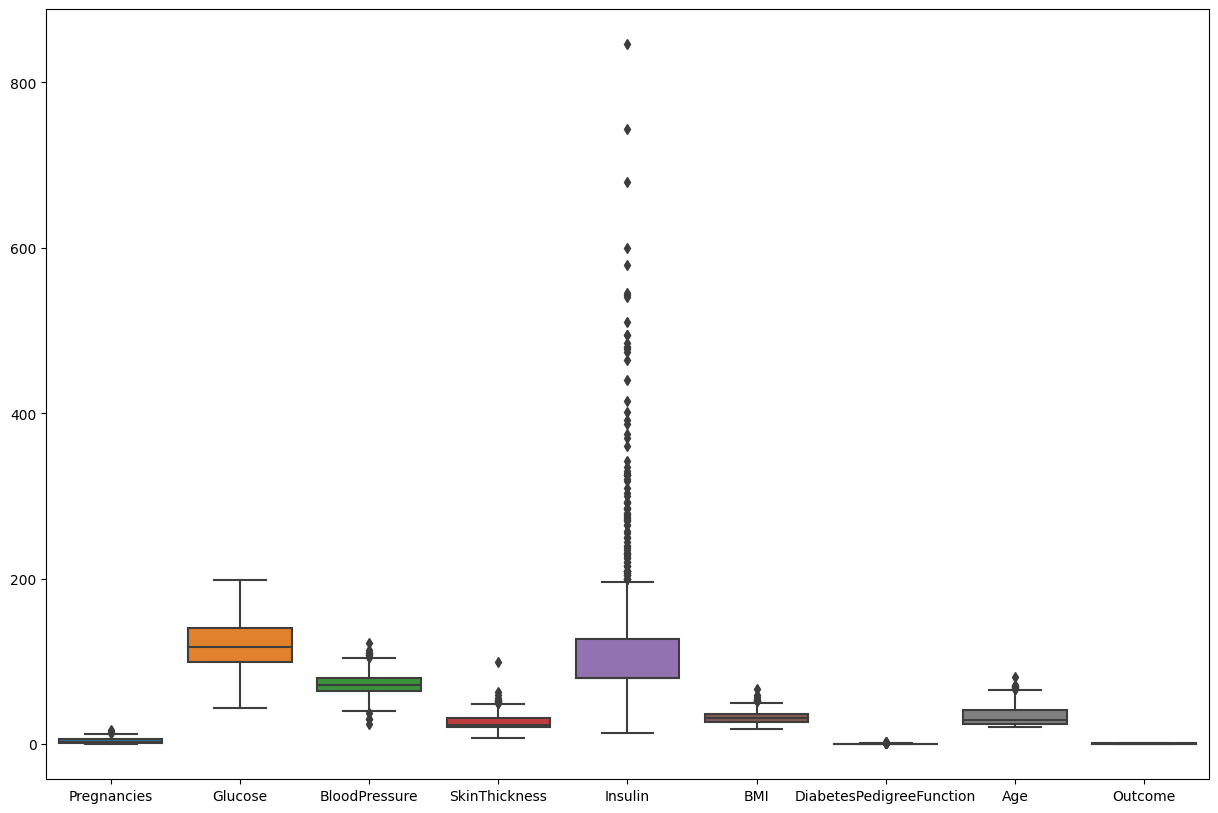

In [17]:
# now we have dealt with the 0 vlaues and data looks better. But, thre still are outliers in some columns. lets visuliaxe
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data)
plt.show()

In [18]:
### lets divide independent and dependent feature
X=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [19]:
## now divide into train test split data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [20]:
def scaler_standar(X_train,X_test):
    # Scaling the data
    scaler = StandardScaler()
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    # saving the model
    file= open('/config/workspace/Model/scaler2.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled,X_test_scaled

In [21]:
X_train_scaled,X_test_scaled=scaler_standar(X_train,X_test)

In [22]:
log_reg= LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
## Hyperparameter Tuning 
## GridsearchCV
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
# parameter grid
Parameters={
    'penalty': ['l1','l2'],
    'C'      : np.logspace(-3,3,7),
    'solver' : ['newton-cg','lbfgs','liblinear']
}

In [24]:
## GridsearchCV
clf=GridSearchCV(estimator=log_reg,  ## models
             param_grid=Parameters,  ## Hyperparameters
             scoring='accuracy',     ## metrics of scoring
                cv=10)               ## number of folds
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [25]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [26]:
clf.best_score_

0.763793103448276

#### let's see how well perform on the test dataset

In [27]:
y_pred=clf.predict(X_test_scaled)

In [28]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.796875

In [29]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [30]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [31]:
Accuracy = (true_positive+ true_negative)/(true_positive + false_positive + false_negative+true_negative)
Accuracy

0.796875

In [32]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [33]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [34]:
F1_Score=2*(Recall*Precision)/(Recall+Precision)
F1_Score

0.8571428571428572

In [35]:
file=open('/config/workspace/Model/modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()